In [3]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=0
%matplotlib inline

import os, sys
import time
from os.path import exists as pexists, join as pjoin
import numpy as np
import matplotlib.pyplot as plt
import lib
import torch, torch.nn as nn
import torch.nn.functional as F
from lib.gams.vis_utils import vis_main_effects
import pandas as pd
from sklearn.model_selection import train_test_split
import json
import seaborn as sns
import pickle

device = 'cuda' if torch.cuda.is_available() else 'cpu'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=0


In [19]:
all_dfs = {}
for model in ['ga2m', 'gam', 'ebm', 'spline']:
    if model not in all_dfs:
        all_dfs[model] = []
    for fold in range(5):
        with open(f'best_dfs/bikeshare_{model}_f{fold}.pkl', 'rb') as fp:
            all_dfs[model].append(pickle.load(fp))

    all_dfs[model] = lib.utils.average_GAM_dfs(all_dfs[model])

In [20]:
all_dfs['ga2m'].head()

,feat_name,feat_idx,x,y,y_std,counts,importance
0,offset,-1,None,[188.0624243955452],[1.0276432421074186],None,188.062424
1,season,0,"[1, 2, 3, 4]","[-33.52264201668278, -2.3265632366845934, 5.54...","[1.2949176578072288, 1.3173775718395433, 0.935...","[4242, 4409, 4496, 4232]",17.545413
2,yr,1,"[0, 1]","[-41.194834462549636, 41.17528039738787]","[0.4394025318613898, 0.19285292076277166]","[8645, 8734]",41.185007
3,mnth,2,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[-13.901499766554263, -4.335122908612569, 1.54...","[1.370373533629814, 1.0407802843775666, 0.8787...","[1429, 1341, 1473, 1437, 1488, 1440, 1488, 147...",7.603441
4,hr,3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-126.63473514395866, -143.18371052774725, -15...","[2.0821698180412342, 1.0060036764132547, 1.737...","[726, 724, 715, 697, 697, 717, 725, 727, 727, ...",97.870802


All main effects

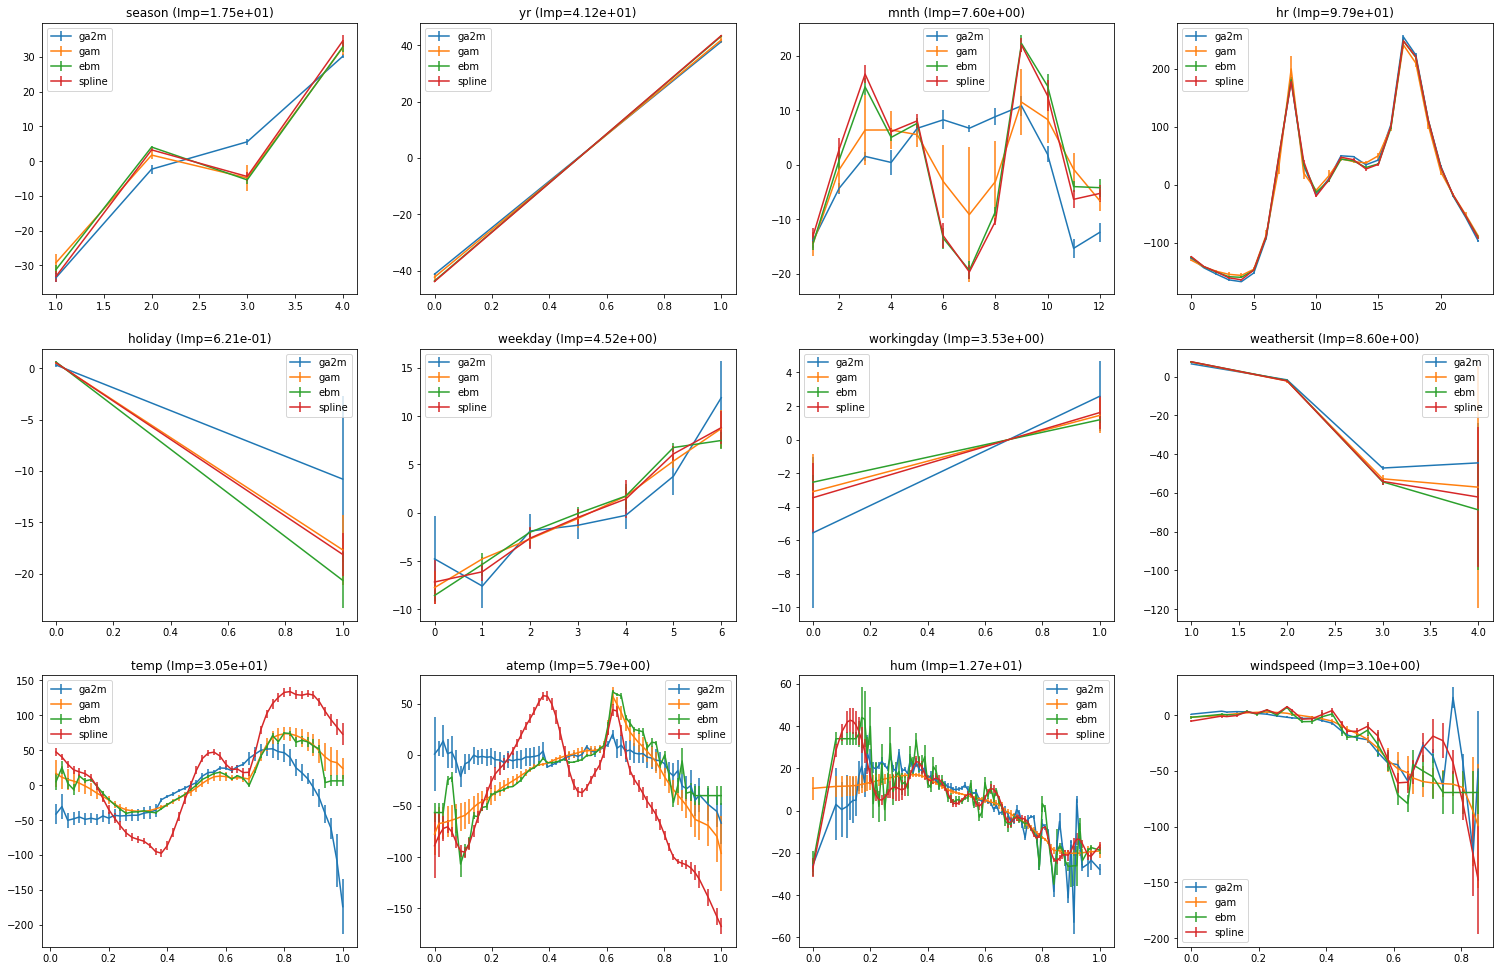

In [21]:
fig, ax = vis_main_effects(all_dfs)

Top 8 interactions

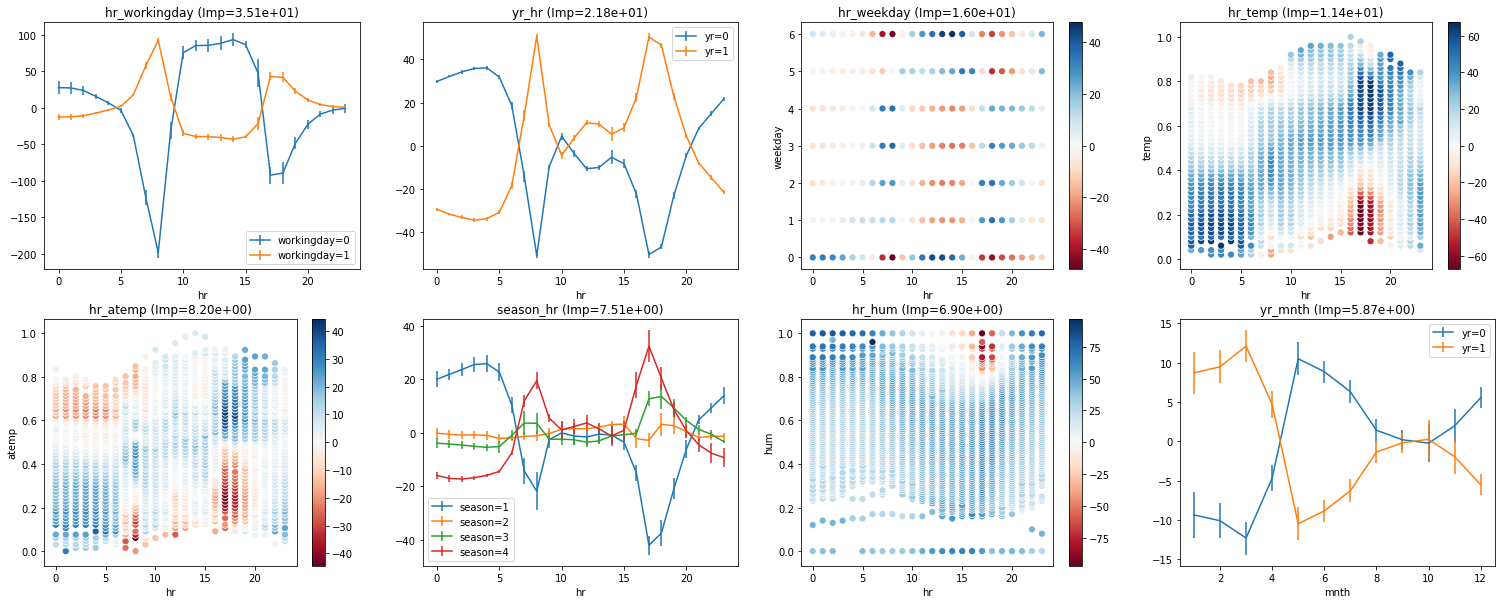

In [22]:
fig, ax = vis_main_effects({'NODE-GA2M': all_dfs['ga2m']}, top_interactions=8, only_interactions=True)